# Play Tic-Tac-Toe Interactively (Simple Implementation)

## The board

I represent the board as a vector of length 9. The values are `' ', 'x', 'o'`.  

In [ ]:
def empty_board():
    return [' '] * 9

board = empty_board()
display(board)

### Helper functions

Show the board.

In [ ]:
import numpy as np

def show_board_text(board):
    """display the board"""
    b = np.array(board).reshape((3,3))
    print(b)

board = empty_board()
show_board_text(board)    

print()
print("Add some x's")
board[0] = 'x'; board[3] = 'x'; board[6] = 'x';  
show_board_text(board)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def show_board(board, help = False, colors = {' ': 'white', 'x': 'red', 'o': 'black'}):
    b = np.array(board).reshape((3,3))

    fig = plt.matshow(np.zeros((3, 3)), cmap = ListedColormap(['w']))
    fig.axes.axis('off')
    
    plt.hlines([.5, 1.5], -.5, 2.5)
    plt.vlines([.5, 1.5], -.5, 2.5)

    for row in range(3):
        for col in range(3):
            plt.text(row, col, b[col, row], 
                 fontsize = 64, 
                 color = colors[b[col, row]],
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
        
    if help:
        for row in range(3):
            for col in range(3):
                plt.text(col, row - .4, col + 3 * row, 
                     fontsize = 12, 
                     color = 'gray',
                     horizontalalignment = 'center',
                     verticalalignment = 'center')
        
        
    plt.show()
    
print()
print("Add some x's and o's")
board[0] = 'x'; board[3] = 'o'; board[6] = 'x';  
show_board(board)

Determine if the current board/state has a winner.

In [ ]:
def check_win(board):
    """check the board and return one of x, o, d (draw), or n (for next move)"""

    board = np.array(board).reshape((3,3))
   
    diagonals = np.array([[board[i][i] for i in range(len(board))], 
                          [board[i][len(board)-i-1] for i in range(len(board))]])
    
    for a_board in [board, np.transpose(board), diagonals]:
        for row in a_board:
            if len(set(row)) == 1 and row[0] != ' ':
                return row[0]

    # check for draw
    if(np.sum(board == ' ') < 1):
        return 'd'
    
    return 'n'

show_board(board)
print('Win? ' + check_win(board))

print()
show_board(empty_board())
print('Win? ' + check_win(empty_board()))

What are the possible actions given the current board?

In [ ]:
def actions(board):
    """return possible actions as a vector of indices"""
    return np.where(np.array(board) == ' ')[0].tolist()

show_board(board)
actions(board)

What is the new state after executing an action. 

In [ ]:
def result(state, player, action):
    """Add move to the board."""
    
    state = state.copy()
    state[action] = player
  
    return state

show_board(empty_board())

print()
print("State for placing an x at position 4:")
show_board(result(empty_board(), 'x', 4))

## Experiments


### Baseline: Randomized Player

A completely randomized player agent can be used as a weak baseline.

In [ ]:
def random_player(board, player = None):
    """Simple player that chooses a random empy square (equal probability of all permissible actions). 
    player is unused."""
    return np.random.choice(actions(board))

show_board(board)
%time random_player(board)

### The Environment

Implement the environment that calls the agent. The percept is the board and the action is move.

In [ ]:
def switch_player(player, x, o):
    if player == 'x':
        return 'o', o
    else:
        return 'x', x

def play(x, o, N = 1, show_final_board = False):
    """Let two agents play each other N times. x starts. x and y are agent functions that 
    get the board as the percept and return their next action."""
    results = {'x': 0, 'o': 0, 'd': 0}
    
    for i in range(N):
        board = empty_board()
        player, fun = 'x', x
        
        while True:
            a = fun(board, player)
            board = result(board, player, a)
            
            win = check_win(board)   # returns the 'n' if the game is not done.
            if win != 'n':
                results[win] += 1
                if show_final_board: 
                    print("Final board:")
                    show_board(board)
                break
            
            player, fun = switch_player(player, x, o)   
    
    return results

In [ ]:
play(random_player, random_player, show_final_board=True)

Implement the interactive player. It shows the board and asks you for the move.

In [ ]:
from IPython.display import clear_output

def interactive_player(board, player = None):
    clear_output(wait = False)
    show_board(board, help = True)
    
    available = actions(board)
    print(f'Available actions are: {available}')

    retry = True
    while retry:
        try:
            move = int(input("Your move:\n"))
            if move in available:
                retry = False
            else:
                raise ValueError()
        except ValueError:
            print("Please enter a valid move.")

    return(move)

Start an interactive game as x

In [ ]:
play(interactive_player, random_player, show_final_board=True)

Start an interactive game as o

Start an interactive game as o

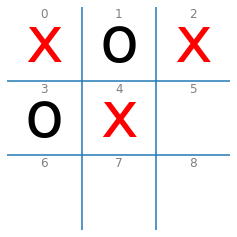

Available actions are: [5, 6, 7, 8]


Your move:
 5


Final board:


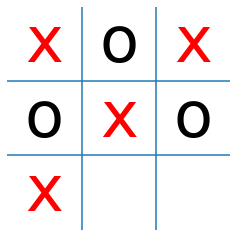

{'x': 1, 'o': 0, 'd': 0}

In [12]:
play(random_player, interactive_player, show_final_board=True)